In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("Iris.csv")

In [18]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
# Displaying The Structure of the dataset
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
# Displaying The Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
# Check for misssing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
# Selecting the relevant columns for illustration
features = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm']]

In [22]:
#standardize the data
scaler = StandardScaler()
scaled_fea = scaler.fit_transform(features)

# dispalying the first 5 rows of the scaled features
scaled_fea[:5]

array([[-0.90068117,  1.03205722, -1.3412724 ],
       [-1.14301691, -0.1249576 , -1.3412724 ],
       [-1.38535265,  0.33784833, -1.39813811],
       [-1.50652052,  0.10644536, -1.2844067 ],
       [-1.02184904,  1.26346019, -1.3412724 ]])

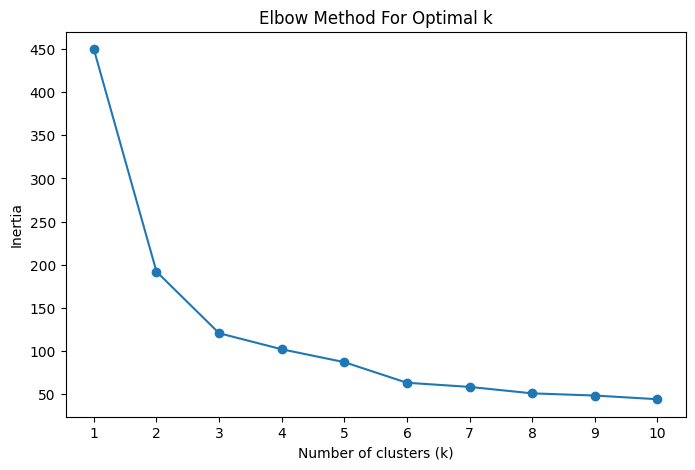

In [23]:
# Finding optimal no. of clusters using Elbow Method
inertia = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_fea)
    inertia.append(kmeans.inertia_)

#plot the elbow method graph
plt.figure(figsize=(8,5))
plt.plot(k_range,inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.show()

In [24]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_labels = kmeans.fit_predict(scaled_fea)

# adding cluster labels 
df['Cluster'] = clusters_labels
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2


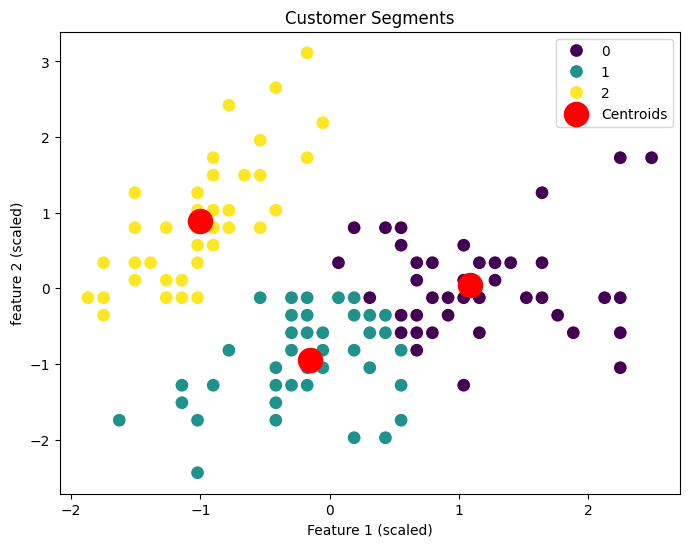

In [25]:
# Visualizing clusters 
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_fea[:,0], y=scaled_fea[:,1], hue=clusters_labels, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300,c='red', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel("feature 2 (scaled)")
plt.legend()
plt.show()